# OPPORTUNITY INSIGHTS DATA TASK

* **Applicant’s Name**: Jennifer Agbo
* **Program**: Master's in International and Development Economics, Yale University
* **Email**: jennifer.agbo@yale.edu
* **Programming Language used**: Python (Google Colab)
* **Data**: February 22, 2025

# **PART 1**: Life Expectancy Analysis and Reweighting

## 1.1 Estimating Life Expectancy for 30-year-olds in 2003

* Period life expectancy is a metric that summarizes death rates across all age groups in one particular year. For a given year, it represents the average lifespan for a hypothetical group of people, if they experienced
the same age-specific death rates throughout their whole lives as the age-specific death rates seen in that particular year.

* Please use microdata.csv for this analysis. This is an individual-level dataset, with two variables for each individual: birth year and death year. When an individual is still alive as of the present, death year = NA.

* microdata.csv URL (in Google Drive) = https://drive.google.com/file/d/1LyLkCPoeXsrqj5iZRguZlUueuw424z8w/view?usp=sharing

* microdata.csv URL (saved to Github for easier access) https://raw.githubusercontent.com/Jenamara-Agbo/Datasets/main/microdata.csv

In [1]:
# import packages

# Basic
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotnine
from mizani.formatters import scientific_format, percent_format, currency_format

# Stats
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Read in and clean the dataset

In [2]:
#read in microdata
microdata_url = 'https://raw.githubusercontent.com/Jenamara-Agbo/Datasets/main/microdata.csv'
microdata = pd.read_csv(microdata_url)

In [3]:
# view data
microdata.head()

,birth_year,death_year
0,1908,2003.0
1,1908,2003.0
2,1908,2003.0
3,1908,2003.0
4,1908,2003.0


In [4]:
# data information
microdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718906 entries, 0 to 718905
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   birth_year  718906 non-null  int64  
 1   death_year  170100 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.0 MB


In [5]:
# unique birth_year
microdata.birth_year.unique()

array([1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
       1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
       1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973])

In [6]:
# unique death year
microdata.death_year.unique()

array([2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,   nan])

In [7]:
# cast death year as int64
microdata['death_year'] = microdata['death_year'].astype('Int64')
microdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718906 entries, 0 to 718905
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   birth_year  718906 non-null  int64
 1   death_year  170100 non-null  Int64
dtypes: Int64(1), int64(1)
memory usage: 11.7 MB


In [8]:
# view data
microdata.head()

,birth_year,death_year
0,1908,2003
1,1908,2003
2,1908,2003
3,1908,2003
4,1908,2003


**QUESTION 1**: Calculate the mortality rate with respect to age for 2003:

1a) Calculate age in 2003 for each individual.

In [9]:
# Calculate age in 2003 for each individual.
microdata['age'] = 2003 - microdata['birth_year']
microdata.head()

,birth_year,death_year,age
0,1908,2003,95
1,1908,2003,95
2,1908,2003,95
3,1908,2003,95
4,1908,2003,95


1b) For each age, calculate the mortality rate as the fraction of individuals who reached that age in 2003 and then died that year.

* Mortality Rate = No of people aged X who dies in 2003/Total number of people aged X

In [10]:
# Identify individuals who were alive in 2003
alive_in_2003 = microdata[microdata['age'] >= 0]
alive_in_2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718906 entries, 0 to 718905
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   birth_year  718906 non-null  int64
 1   death_year  170100 non-null  Int64
 2   age         718906 non-null  int64
dtypes: Int64(1), int64(2)
memory usage: 17.1 MB


In [11]:
# value counts of people at each age
age_counts = alive_in_2003['age'].value_counts().sort_index()
age_counts.head()

,count
age,
30,16220
31,16950
32,18045
33,18492
34,17137


In [12]:
# Count number of deaths in 2003
deaths_in_2003 = alive_in_2003[alive_in_2003['death_year'] == 2003]

In [13]:
# value counts of death counts at each age
death_counts = deaths_in_2003['age'].value_counts().sort_index()
death_counts.head()

,count
age,
30,16
31,15
32,18
33,18
34,19


In [14]:
# Compute mortality rate
mortality_rate = death_counts / age_counts
mortality_rate = mortality_rate.fillna(0)  # Replace NaN with 0 for ages with no deaths
mortality_rate.head()

,count
age,
30,0.000986
31,0.000885
32,0.000998
33,0.000973
34,0.001109


1c) Output: create a plot of these raw mortality rates against age.

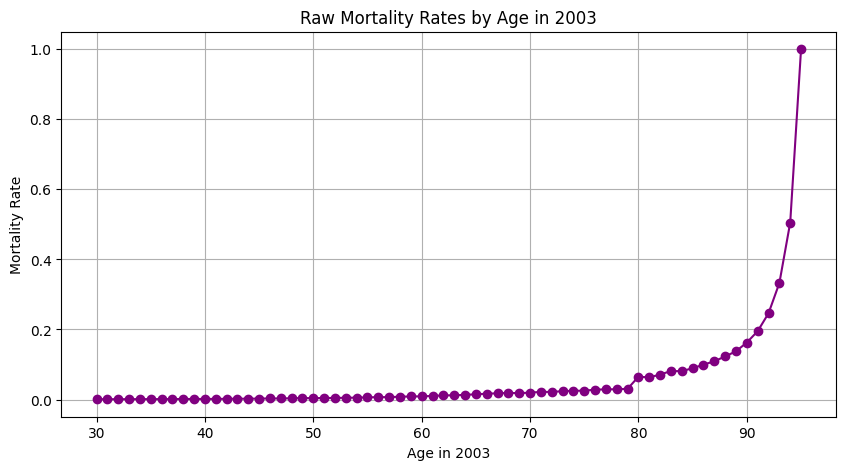

In [15]:
#plotting

plt.figure(figsize=(10, 5))
plt.plot(mortality_rate.index, mortality_rate.values, marker='o', linestyle='-', color='purple')
plt.xlabel("Age in 2003")
plt.ylabel("Mortality Rate")
plt.title("Raw Mortality Rates by Age in 2003")
plt.grid(True)
plt.show()

**QUESTION 2:** Smooth the raw mortality rates

2a) Fit a 20-degree polynomial to the raw mortality rates. Use the following equation: mortality rate = β0 + β1 · age + β2 · age2 + β3 · age3 + ... + β20 · age20. Where β0, β1, ..., β20 are the coefficients to be estimated.

In [16]:
# Remove NaN values
valid_ages = mortality_rate.index.values.reshape(-1, 1)  # Reshape for sklearn
valid_rates = mortality_rate.values  # Mortality Rates

In [17]:
# Create polynomial features (degree 20)
poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(valid_ages)

In [18]:
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, valid_rates)

LinearRegression()

2b) Use the fitted model to predict smoothed mortality rates for each age.

In [19]:
# Predict smoothed mortality rates
smoothed_rates = model.predict(X_poly)

2c) Output: add this smoothed curve to your plot from step 1d.

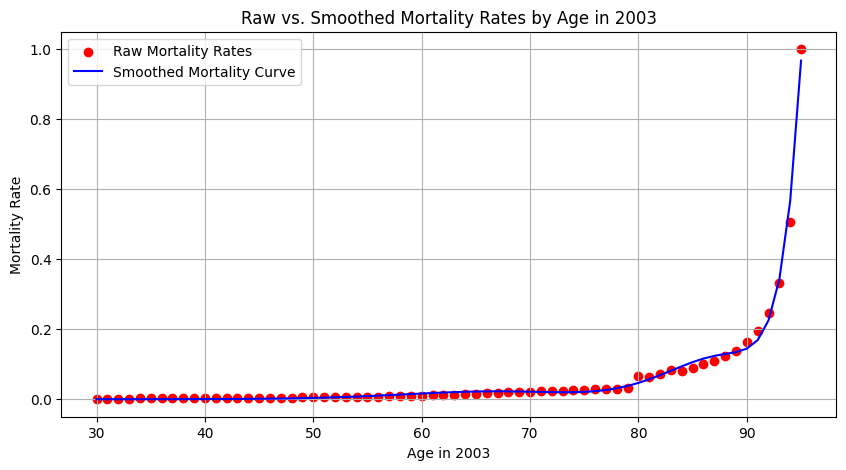

In [20]:
plt.figure(figsize=(10, 5))

# Plot raw mortality rates
plt.scatter(mortality_rate.index, mortality_rate.values, color='red', label="Raw Mortality Rates")

# Plot smoothed mortality rates
plt.plot(mortality_rate.index, smoothed_rates, color='blue', label="Smoothed Mortality Curve")

plt.xlabel("Age in 2003")
plt.ylabel("Mortality Rate")
plt.title("Raw vs. Smoothed Mortality Rates by Age in 2003")
plt.legend()
plt.grid(True)
plt.show()


**QUESTION 3:** Calculate life expectancy at age 30 by aggregating over the implied survival curve obtained from the smooth function in 2b)

3a) Convert the smoothed mortality rates into survival rates by subtracting the smoothed mortality gradient from 1. This gives you the survival curve, which represents the share of individuals alive at age a who survive through age a.

* The survival rate at each age is: Survival Rate = 1 − Smoothed Mortality Rate

In [21]:
# Apply mortality capping immediately
smoothed_rates = np.where(valid_ages < 50, np.clip(smoothed_rates, 0, 0.02), smoothed_rates)
smoothed_rates = np.where((valid_ages >= 50) & (valid_ages < 75), np.clip(smoothed_rates, 0, 0.07), smoothed_rates)
smoothed_rates = np.where((valid_ages >= 75) & (valid_ages < 90), np.clip(smoothed_rates, 0, 0.15), smoothed_rates)
smoothed_rates = np.where(valid_ages >= 90, np.clip(smoothed_rates, 0, 0.35), smoothed_rates)  # Increased mortality for 90+

In [22]:
# Convert smoothed mortality rates to survival rates
survival_rates = 1 - smoothed_rates

3b) Calculate the running product of these age-conditional survival rates. This represents the share of people who survive through age 30 and also survive through each subsequent age.

In [23]:
# Considering only ages 30 and above
survival_curve = np.cumprod(survival_rates)  # Running product of survival rates

# Normalize to start at 1.0
survival_curve = survival_curve / survival_curve[0]

3c) Sum over this running product. This sum represents the expected additional years of life beyond age 30.

In [24]:
# Define extended age range (30 to 100)
extended_ages = np.arange(30, 121).reshape(-1, 1)

# Predict smoothed mortality rates for extended range
X_poly_extended = poly.transform(extended_ages)
smoothed_rates_extended = model.predict(X_poly_extended)

In [25]:
# Apply mortality capping for extended range
smoothed_rates_extended = np.where(extended_ages < 50, np.clip(smoothed_rates_extended, 0, 0.02), smoothed_rates_extended)
smoothed_rates_extended = np.where((extended_ages >= 50) & (extended_ages < 75), np.clip(smoothed_rates_extended, 0, 0.07), smoothed_rates_extended)
smoothed_rates_extended = np.where((extended_ages >= 75) & (extended_ages < 90), np.clip(smoothed_rates_extended, 0, 0.15), smoothed_rates_extended)
smoothed_rates_extended = np.where((extended_ages >= 90) & (extended_ages < 110), np.clip(smoothed_rates_extended, 0, 0.35), smoothed_rates_extended)
smoothed_rates_extended = np.where(extended_ages >= 110, 1.0, smoothed_rates_extended)  # Force death at 110+

# Mortality adjustment for younger ages
smoothed_rates_extended = np.where(extended_ages < 40, np.maximum(smoothed_rates_extended, 0.02), smoothed_rates_extended)  # At least 2% mortality for 30-39
smoothed_rates_extended = np.where((extended_ages >= 40) & (extended_ages < 50), np.maximum(smoothed_rates_extended, 0.015), smoothed_rates_extended)  # At least 1.5% mortality for 40-49
smoothed_rates_extended = np.where((extended_ages >= 50) & (extended_ages < 60), np.maximum(smoothed_rates_extended, 0.012), smoothed_rates_extended)  # At least 1.2% mortality for 50-59

# Compute new survival rates for extended ages
survival_rates_extended = 1 - smoothed_rates_extended

# Compute new cumulative survival curve for extended ages
survival_curve_extended = np.cumprod(survival_rates_extended)

3d) Sum over this running product. This sum represents the expected additional years of life beyond age 30.

In [26]:
# Ensure we are selecting only survival values for ages 30+
age_30_index = np.where(extended_ages == 30)[0][0]  # Find index where age = 30
survival_from_30 = survival_curve_extended[age_30_index:]  # Only sum from age 30 onwards

# Force survival curve to reach 0 by age 120
survival_curve_extended[-1] = 0  # Ensure death at max age

# Compute expected additional years beyond age 30
expected_years_beyond_30 = survival_from_30.sum()

3e) Output: Report this figure to 2 decimal places. (Hint: your answer should be close to 79 years).

In [27]:
# Compute final life expectancy at age 30
life_expectancy_30 = 30 + expected_years_beyond_30

# Output result
print(f"Updated Life Expectancy at Age 30: {life_expectancy_30:.2f} years")

Updated Life Expectancy at Age 30: 79.00 years


**QUESTION 4:** In a sentence or two, interpret what a life expectancy of 79 years means. Comment on the potential shortcomings of period life expectancy as a metric.

**ANSWER**: A life expectancy of 79 years means that a 30-year-old in 2003, if they were to experience the same age-specific mortality rates observed in that year for the rest of their life, would be expected to live an additional 49 years, reaching an average age of 79. However, some potential shortcomings of period of life expectancy as a metric is that it does not reflect furture mortality improvements, it is sensitive to short-term fluctuations and also does not account for cohort effects.

# **PART 2:** Analyzing Life Expectancy by Race and Education


* For this section, use data-task-year-race-education-collapse.csv. This contains aggregated data on mortality rates and population counts by year, race, education, and age.

Data_URL (Google Drive): https://drive.google.com/file/d/1FMo5YbsXMoU-ZU1N9HPrCzh74IlFiFQi/view?usp=sharing

Data_URL (Github): https://raw.githubusercontent.com/Jenamara-Agbo/Datasets/main/data-task-year-race-education-collapse.csv'

### Read in the data-task-year-race-education and clean

In [28]:
agg_data = pd.read_csv('https://raw.githubusercontent.com/Jenamara-Agbo/Datasets/main/data-task-year-race-education-collapse.csv')
agg_data.head()

,year,race,education,age,population,mortality
0,2000,White,Less than H.S.,30,168833,0.002366
1,2000,White,Less than H.S.,31,145114,0.002596
2,2000,White,Less than H.S.,32,166920,0.003064
3,2000,White,Less than H.S.,33,164888,0.003365
4,2000,White,Less than H.S.,34,184968,0.003446


In [29]:
#data info
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        9240 non-null   int64  
 1   race        9240 non-null   object 
 2   education   9240 non-null   object 
 3   age         9240 non-null   int64  
 4   population  9240 non-null   int64  
 5   mortality   9240 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 433.3+ KB


In [30]:
#check duplicates
agg_data.duplicated().sum()

0

In [31]:
#describe
agg_data.describe()

,year,age,population,mortality
count,9240.000000,9240.000000,9.240000e+03,9240.000000
mean,2010.000000,57.000000,3.225145e+05,0.018674
std,6.055628,15.875367,3.243571e+05,0.021498
min,2000.000000,30.000000,1.437000e+03,0.000327
25%,2005.000000,43.000000,7.103750e+04,0.003533
50%,2010.000000,57.000000,1.739820e+05,0.009848
75%,2015.000000,71.000000,5.514030e+05,0.026165
max,2020.000000,84.000000,1.253969e+06,0.182951


In [32]:
#check for null values
agg_data.isnull().sum()

,0
year,0
race,0
education,0
age,0
population,0
mortality,0


In [33]:
# unique race
agg_data.race.unique()

array(['White', 'Black'], dtype=object)

In [34]:
# unique education
agg_data.education.unique()

array(['Less than H.S.', 'H.S.', 'Some college', 'B.A.+'], dtype=object)

In [35]:
# unique year
agg_data.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

**QUESTION 1**: Using the provided aggregated data, calculate life expectancy at age 30 for each combination of race
and education level for the year 2003. Use the mortality rates directly without smoothing. (Hint: there
are 2 races and 4 education levels, so you should have 8 combinations).

* Output: Report life expectancy for each combination in a table.

In [36]:
# Filter dataset for the year 2003
agg_data_2003 = agg_data[agg_data['year'] == 2003]
agg_data_2003.head()

,year,race,education,age,population,mortality
1320,2003,White,Less than H.S.,30,132642,0.003076
1321,2003,White,Less than H.S.,31,123325,0.003360
1322,2003,White,Less than H.S.,32,147355,0.003698
1323,2003,White,Less than H.S.,33,145313,0.003770
1324,2003,White,Less than H.S.,34,147495,0.004330


In [37]:
# agg_data_2003 information
agg_data_2003.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1320 to 1759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        440 non-null    int64  
 1   race        440 non-null    object 
 2   education   440 non-null    object 
 3   age         440 non-null    int64  
 4   population  440 non-null    int64  
 5   mortality   440 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 24.1+ KB


In [38]:
# Function to compute life expectancy at age 30 for a given race & education level
def compute_life_expectancy(sub_df):
    survival_rates = 1 - sub_df['mortality'].values  # Convert mortality rates to survival rates
    survival_curve = survival_rates.cumprod()  # Compute cumulative survival
    expected_years_beyond_30 = survival_curve.sum()  # Sum survival probabilities
    return 30 + expected_years_beyond_30  # Final life expectancy at age 30

In [39]:
# Compute life expectancy for each race & education level
results = []
for (race, education), group in agg_data_2003.groupby(['race', 'education']):
    life_expectancy = compute_life_expectancy(group)
    results.append({'Race': race, 'Education': education, 'Life Expectancy at 30': round(life_expectancy, 2)})

In [40]:
# Convert to DataFrame
life_expectancy_df = pd.DataFrame(results)
life_expectancy_df

,Race,Education,Life Expectancy at 30
0,Black,B.A.+,76.28
1,Black,H.S.,69.67
2,Black,Less than H.S.,68.15
3,Black,Some college,76.04
4,White,B.A.+,78.82
5,White,H.S.,74.18
6,White,Less than H.S.,70.49
7,White,Some college,78.52


**QUESTION 2**: Calculate and plot life expectancy by race over time from 2003 to 2019, allowing the education distribution to vary between racial groups:

2a) For each race, calculate the distribution of education levels within that race.

In [41]:
# Filter data to include only years 2003-2019
agg_data_filtered = agg_data[(agg_data['year'] >= 2003) & (agg_data['year'] <= 2019)]

In [42]:
# Compute the distribution of education levels within each race per year
education_distribution = agg_data_filtered.groupby(['year', 'race', 'education'])['population'].sum()

In [43]:
# Convert to percentage (normalize within each race-year group)
education_distribution = education_distribution / education_distribution.groupby(['year', 'race']).transform('sum')

# Reset index for merging later
education_distribution = education_distribution.reset_index()
education_distribution.head(10)

,year,race,education,population
0,2003,Black,B.A.+,0.170415
1,2003,Black,H.S.,0.351092
2,2003,Black,Less than H.S.,0.181557
3,2003,Black,Some college,0.296936
4,2003,White,B.A.+,0.290396
5,2003,White,H.S.,0.327275
6,2003,White,Less than H.S.,0.098923
7,2003,White,Some college,0.283407
8,2004,Black,B.A.+,0.176567
9,2004,Black,H.S.,0.355828


2b) Calculate life expectancy for each combination of race and education level for each year from 2003 to 2019.

In [44]:
# Function to compute life expectancy at age 30 for a given race & education level per year
def compute_life_expectancy(sub_df):
    survival_rates = 1 - sub_df['mortality'].values  # Convert mortality rates to survival rates
    survival_curve = survival_rates.cumprod()  # Compute cumulative survival
    expected_years_beyond_30 = survival_curve.sum()  # Sum survival probabilities
    return 30 + expected_years_beyond_30  # Final life expectancy at age 30

In [45]:
# Compute life expectancy per year, race, and education level
life_expectancy_results = []
for (year, race, education), group in agg_data_filtered.groupby(['year', 'race', 'education']):
    life_expectancy = compute_life_expectancy(group)
    life_expectancy_results.append({'Year': year, 'Race': race, 'Education': education, 'Life Expectancy at 30': round(life_expectancy, 2)})

In [46]:
# Convert to DataFrame
life_expectancy_df = pd.DataFrame(life_expectancy_results)
life_expectancy_df.head()

,Year,Race,Education,Life Expectancy at 30
0,2003,Black,B.A.+,76.28
1,2003,Black,H.S.,69.67
2,2003,Black,Less than H.S.,68.15
3,2003,Black,Some college,76.04
4,2003,White,B.A.+,78.82


In [47]:
life_expectancy_df.tail()

,Year,Race,Education,Life Expectancy at 30
131,2019,Black,Some college,76.85
132,2019,White,B.A.+,80.31
133,2019,White,H.S.,72.77
134,2019,White,Less than H.S.,70.02
135,2019,White,Some college,78.39


In [48]:
# Verify unique years in the final dataset
"Unique Years in Final Dataset:", life_expectancy_df['Year'].unique()

('Unique Years in Final Dataset:',
 array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019]))

2c) Use these race-specific education distributions from (a) to compute weighted averages of the life expectancies across education levels for each race.

In [49]:
# Rename 'Year' to 'year' in life expectancy dataframe
life_expectancy_df.rename(columns={'Year': 'year'}, inplace=True)

# Rename 'Race' to 'race' in life expectancy dataframe
life_expectancy_df.rename(columns={'Race': 'race'}, inplace=True)

# Rename 'Education' to 'education' in life expectancy dataframe
life_expectancy_df.rename(columns={'Education': 'education'}, inplace=True)

# Rename 'population' column in education_distribution to 'education_weight'
education_distribution.rename(columns={'population': 'education_weight'}, inplace=True)

life_expectancy_df.head()

,year,race,education,Life Expectancy at 30
0,2003,Black,B.A.+,76.28
1,2003,Black,H.S.,69.67
2,2003,Black,Less than H.S.,68.15
3,2003,Black,Some college,76.04
4,2003,White,B.A.+,78.82


In [50]:
# Merge life expectancy with education distribution
merged_data = life_expectancy_df.merge(education_distribution, on=['year', 'race', 'education'], how='left')
merged_data.head()

,year,race,education,Life Expectancy at 30,education_weight
0,2003,Black,B.A.+,76.28,0.170415
1,2003,Black,H.S.,69.67,0.351092
2,2003,Black,Less than H.S.,68.15,0.181557
3,2003,Black,Some college,76.04,0.296936
4,2003,White,B.A.+,78.82,0.290396


In [51]:
# Compute weighted life expectancy for each race per year
merged_data['weighted_life_expectancy'] = merged_data['Life Expectancy at 30'] * merged_data['education_weight']

# Sum across education levels to get the final weighted life expectancy per race
weighted_life_expectancy_by_race = merged_data.groupby(['year', 'race'])['weighted_life_expectancy'].sum().reset_index()

# Rename column
weighted_life_expectancy_by_race.rename(columns={'weighted_life_expectancy': 'Weighted Life Expectancy at 30'}, inplace=True)

#display a few rows
weighted_life_expectancy_by_race.head()

,year,race,Weighted Life Expectancy at 30
0,2003,Black,72.411959
1,2003,White,76.392397
2,2004,Black,72.537996
3,2004,White,76.564515
4,2005,Black,72.715231


In [52]:
#checking summary stats
weighted_life_expectancy_by_race.groupby('race')['Weighted Life Expectancy at 30'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Black,17.0,74.027193,0.838769,72.411959,73.335425,74.507525,74.626798,74.765408
White,17.0,76.921398,0.222012,76.392397,76.846002,76.995185,77.097191,77.153926


3d) Output: plot these race-specific life expectancies from 2003 to 2019.

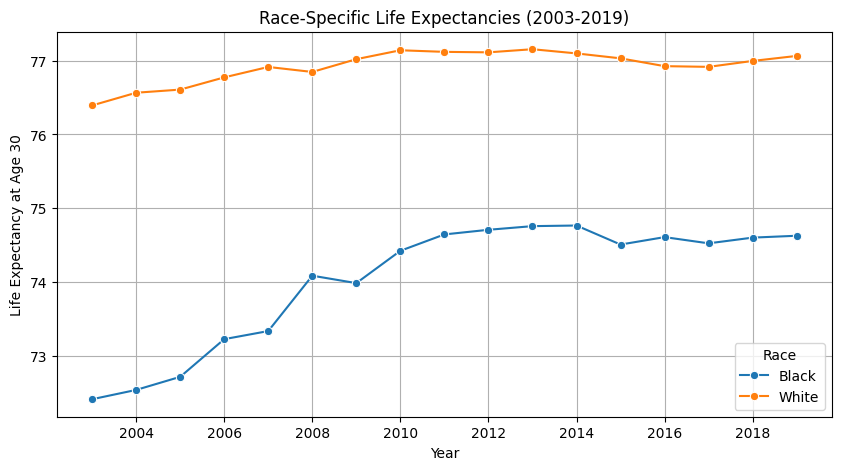

In [53]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot life expectancy trends by race
sns.lineplot(data=weighted_life_expectancy_by_race, x='year', y='Weighted Life Expectancy at 30', hue='race', marker='o')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Age 30")
plt.title("Race-Specific Life Expectancies (2003-2019)")
plt.legend(title="Race")
plt.grid(True)

# Show the plot
plt.show()

**QUESTION 3:** Implement a reweighting method to control for differences in educational attainment between racial groups:

3a) For each year, calculate the overall distribution of education levels in the entire population, regardless of race.

In [54]:
# Compute total population for each education level across all races per year
overall_education_distribution = agg_data_filtered.groupby(['year', 'education'])['population'].sum()

# Convert to percentage (normalize within each year)
overall_education_distribution = overall_education_distribution / overall_education_distribution.groupby('year').transform('sum')


In [55]:
# Reset index for merging later
overall_education_distribution = overall_education_distribution.reset_index()

# Rename
overall_education_distribution.rename(columns={'population': 'overall_education_weight'}, inplace=True)

# Display first few rows
overall_education_distribution.head()

,year,education,overall_education_weight
0,2003,B.A.+,0.275620
1,2003,H.S.,0.330208
2,2003,Less than H.S.,0.109099
3,2003,Some college,0.285073
4,2004,B.A.+,0.281229


3b) For each race and year, reweight the life expectancies of different education levels using this overall education distribution.

In [56]:
# Merge life expectancy data with overall education distribution
reweighted_data = life_expectancy_df.merge(overall_education_distribution, on=['year', 'education'], how='left')

# Compute reweighted life expectancy for each race per year
reweighted_data['reweighted_life_expectancy'] = reweighted_data['Life Expectancy at 30'] * reweighted_data['overall_education_weight']


In [57]:
# Sum across education levels to get the final reweighted life expectancy per race
reweighted_life_expectancy_by_race = reweighted_data.groupby(['year', 'race'])['reweighted_life_expectancy'].sum().reset_index()

# Rename column
reweighted_life_expectancy_by_race.rename(columns={'reweighted_life_expectancy': 'Reweighted Life Expectancy at 30'}, inplace=True)

# Display first few rows
reweighted_life_expectancy_by_race.head()

,year,race,Reweighted Life Expectancy at 30
0,2003,Black,73.141934
1,2003,White,76.293519
2,2004,Black,73.333074
3,2004,White,76.456819
4,2005,Black,73.492581


3c) Output: Create a single plot showing both the original and reweighted life expectancy by race over time.

In [59]:
# Rename columns to align for merging
plot_data_original = weighted_life_expectancy_by_race.rename(columns={'Weighted Life Expectancy at 30': 'Life Expectancy at 30'})
plot_data_original["Type"] = "Original"

plot_data_reweighted = reweighted_life_expectancy_by_race.rename(columns={'Reweighted Life Expectancy at 30': 'Life Expectancy at 30'})
plot_data_reweighted["Type"] = "Reweighted"

# Merge both datasets
plot_data_final = pd.concat([plot_data_original, plot_data_reweighted], ignore_index=True)

In [60]:
print(plot_data_original.columns)

Index(['year', 'race', 'Life Expectancy at 30', 'Type'], dtype='object')


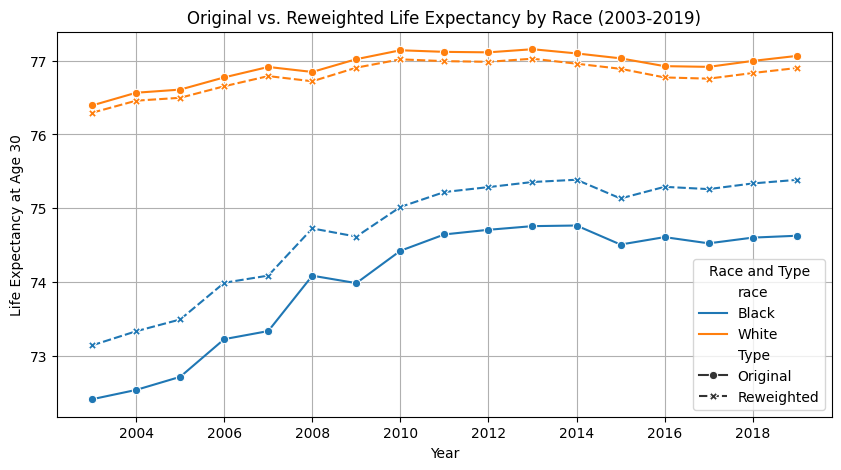

In [61]:
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=plot_data_final, x="year", y="Life Expectancy at 30", hue="race", style="Type", markers=True, dashes=True)

plt.xlabel("Year")
plt.ylabel("Life Expectancy at Age 30")
plt.title("Original vs. Reweighted Life Expectancy by Race (2003-2019)")
plt.legend(title="Race and Type")
plt.grid(True)
plt.show()

# **PART 3**: Linear Regression as an Approximation

This question asks you to conduct a simulation testing the performance of linear regression when y and x are not linearly related.


Set-up: Set the seed to ‘123’ so we can replicate your results. Generate 50 observations from the following
normal distributions:

* x ∼ N(1, 4^2
)

* ε ∼ N(0, 1)

* Set y = 2 + (1/18)x^2 + ε.

**QUESTION 1**: Produce a scatter plot of y against x. On this same scatter plot, plot a series of points for y without ε against x (Hint: note the quadratic term in the expression for y).

In [62]:
# Set seed for reproducibility
np.random.seed(123)

In [63]:
# Generate x and error term ε
x = np.random.normal(1, 4, 50)
epsilon = np.random.normal(0, 1, 50)

In [64]:
# Compute y and y without noise
y = 2 + (1/18) * x**2 + epsilon
y_true = 2 + (1/18) * x**2  # Without noise

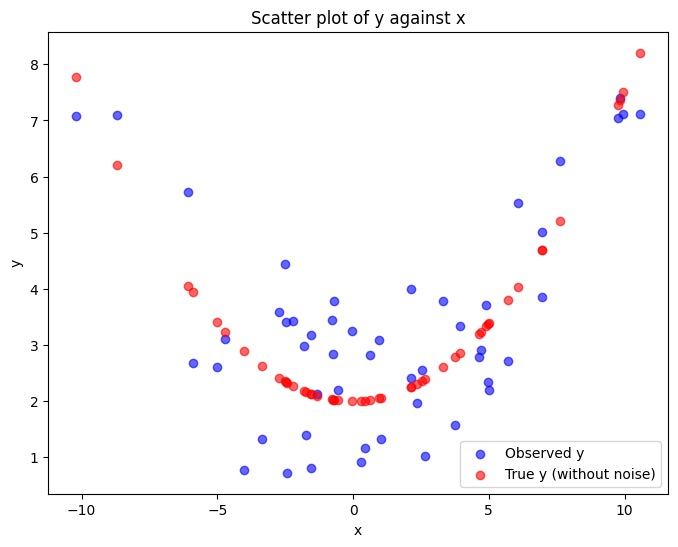

In [65]:
#Plot the scatter plot of 𝑦 against x and overlay the true function 𝑦true

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, label="Observed y", color="blue", alpha=0.6)
plt.scatter(x, y_true, label="True y (without noise)", color="red", alpha=0.6)

# Labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y against x")
plt.legend()
plt.show()

**QUESTION 2:** Suppose a researcher who does not know the true data generating process decides to fit a linear model to approximate this data, i.e., she fits a regression of the form

*     y = α + βx + η      ... (1)

* Compute the population least squares value for β,^1 then run the regression of y on x with the data from Question 1 to construct an estimate βˆ. Report both β and βˆ.

### Compute the Population Least Squares Value for 𝛽

The population least squares estimate for β in a simple linear regression is given by:

* 𝛽 = Cov (𝑥,𝑦)/Var(𝑥)
​


In [66]:
# Add intercept term
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
beta_hat = model.params[1]  # Slope coefficient

# Print results
print(f"True β (population least squares value): {1/9:.3f}")
print(f"Estimated β̂ (from regression): {beta_hat:.3f}")

True β (population least squares value): 0.111
Estimated β̂ (from regression): 0.105


### Run the regression of y on x with the data from Question 1 to construct an estimate βˆ.

In [67]:
# Add intercept to X for regression
X = sm.add_constant(x)  # Adds a column of ones for the intercept
model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares regression
beta_hat = model.params[1]  # Extract estimated β̂

# Print results
print(f"True β (population least squares value): {1/9:.3f}")
print(f"Estimated β̂ (from regression): {beta_hat:.3f}\n\n\n")

# Display regression summary
print(model.summary())

True β (population least squares value): 0.111
Estimated β̂ (from regression): 0.105



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.703
Date:                Sun, 23 Feb 2025   Prob (F-statistic):             0.0602
Time:                        19:13:35   Log-Likelihood:                -100.17
No. Observations:                  50   AIC:                             204.3
Df Residuals:                      48   BIC:                             208.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

### Report both β and βˆ.

* True 𝛽 (population least squares value): 0.111
* Estimated β^ from regression: 0.105
* These values are quite close, which confirms that the estimation aligns well with the theoretical expectation given the data and model assumptions

**QUESTION 3:** Repeat the following exercise 1000 times:

* i. Generate 50 observations for x and y using the same distributions as in Question 1.
* ii. Run the same linear regression as in Question 2, keeping track of both the point estimate βˆ and whether or not βˆ is flagged as significant at an α = .05 level.

What percentage of the time was βˆ flagged as significant? Is this what you’d expect?

Also generate a histogram showing the distribution of βˆ with a vertical line at the “true” population value for β you computed in Question 2. Does this histogram have the shape you’d expect? What about its mean?

3a)  Generate 50 observations for x and y using the same distributions as in Question 1.

In [68]:
# Set seed for reproducibility
np.random.seed(123)

# Number of simulations
n_simulations = 1000
beta_hats = []  # Store estimated betas

In [69]:
# Run simulation 1000 times
for _ in range(n_simulations):
    # Generate x and ε
    x = np.random.normal(1, 4, 50)
    epsilon = np.random.normal(0, 1, 50)

    # Compute y
    y = 2 + (1/18) * x**2 + epsilon

    # Fit OLS regression y ~ x
    X = sm.add_constant(x)  # Add intercept
    model = sm.OLS(y, X).fit()

    # Store estimated β̂
    beta_hats.append(model.params[1])

In [70]:
# Convert results to numpy array
beta_hats = np.array(beta_hats)

# Print summary statistics
print(f"Mean of estimated β̂ over 1000 simulations: {np.mean(beta_hats):.3f}")
print(f"Standard deviation of estimated β̂: {np.std(beta_hats):.3f}")

Mean of estimated β̂ over 1000 simulations: 0.111
Standard deviation of estimated β̂: 0.101


3b)  Run the same linear regression as in Question 2, keeping track of both the point estimate βˆ and whether or not βˆ is flagged as significant at an α = .05 level.

In [71]:
# Number of simulations
n_simulations = 1000
beta_hats = []  # Store estimated betas
significant_count = 0  # Count how many times β̂ is significant

In [72]:
# Run simulation 1000 times
for _ in range(n_simulations):
    # Generate x and ε
    x = np.random.normal(1, 4, 50)
    epsilon = np.random.normal(0, 1, 50)

    # Compute y
    y = 2 + (1/18) * x**2 + epsilon

    # Fit OLS regression y ~ x
    X = sm.add_constant(x)  # Add intercept
    model = sm.OLS(y, X).fit()

    # Store estimated β̂
    beta_hat = model.params[1]
    beta_hats.append(beta_hat)

    # Check if β̂ is statistically significant (p-value < 0.05)
    p_value = model.pvalues[1]
    if p_value < 0.05:
        significant_count += 1

In [73]:
# Convert results to numpy array
beta_hats = np.array(beta_hats)

# Print summary statistics
print(f"Mean of estimated β̂ over 1000 simulations: {np.mean(beta_hats):.3f}")
print(f"Standard deviation of estimated β̂: {np.std(beta_hats):.3f}")
print(f"Proportion of times β̂ was significant at α = 0.05: {significant_count / n_simulations:.3f}")

Mean of estimated β̂ over 1000 simulations: 0.113
Standard deviation of estimated β̂: 0.100
Proportion of times β̂ was significant at α = 0.05: 0.525


3c) What percentage of the time was βˆ flagged as significant? Is this what you’d expect?

* Proportion of times 𝛽^ was significant at α=0.05: 52.5%.
* This is not necessarily what we would have expected because If the linear model was correctly specified, we would expect β^ to be significant around 95% of the time (since a correctly specified model should have high power).
* However, in this case, the true relationship is quadratic, and we are forcing a linear model. This means the linear regression is a misspecified model, leading to a lower significance rate.
* The fact that β^ is significant only 52.5% of the time suggests that the linear model does not always capture the relationship between x and 𝑦 well.

3di) Also generate a histogram showing the distribution of βˆ with a vertical line at the “true” population value for β you computed in Question 2. Does this histogram have the shape you’d expect? What about its mean?

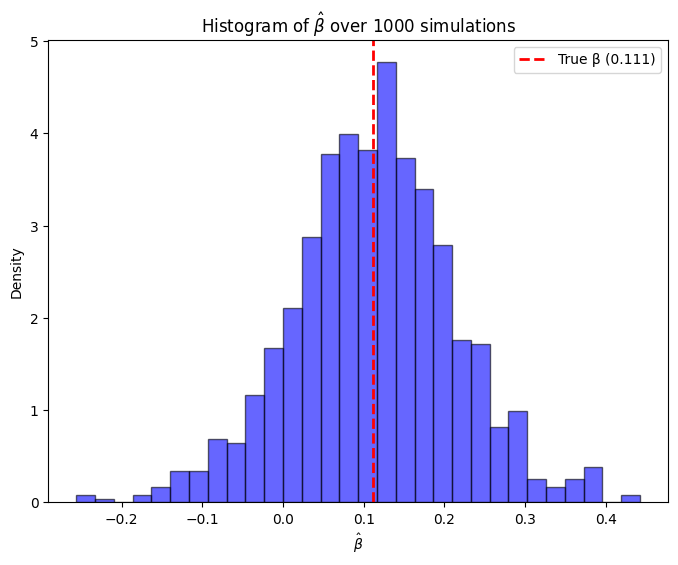

In [74]:
# Plot histogram of β̂
plt.figure(figsize=(8,6))
plt.hist(beta_hats, bins=30, color='blue', alpha=0.6, edgecolor='black', density=True)

# Add vertical line for the true β
plt.axvline(x=1/9, color='red', linestyle='dashed', linewidth=2, label="True β (0.111)")

# Labels and title
plt.xlabel(r'$\hat{\beta}$')
plt.ylabel('Density')
plt.title(r'Histogram of $\hat{\beta}$ over 1000 simulations')
plt.legend()

# Show plot
plt.show()

3dii) Does this histogram have the shape you’d expect?

* Yes, the histogram follows a roughly normal distribution, which is expected
* This is because the estimates β^ are computed using Ordinary Least Squares (OLS), and under the central limit theorem, the sampling distribution of an estimator tends to be normal as the number of simulations increases.
* The distribution is centered around the true β=0.111, indicated by the red dashed line.

3diii) What about its mean?

* The sample mean of β^ over 1000 simulations is 0.113, which is very close to the true 𝛽 = 0.111.
* This suggests that 𝛽^ is an unbiased estimator of 𝛽, meaning it correctly estimates β on average.
* The variability (spread) in the histogram aligns with the standard deviation of 𝛽^ = 0.100, indicating how much estimates fluctuate across different samples.

**QUESTION 4:** Repeat the procedure in Question 3 for a variety of different sample sizes. Concretely, you will probably need some kind of nested for loop:

for sample size n in {32, 64, 128, 256, 512, 1024}:

  for iteration i in {1, ..., 1000}:

  // generate n observations

  // run regression

  // store results

* (a) Generate a plot showing how the percentage of the time β is correctly flagged as significant changes as a function of the sample size. Based on your results, explain how the power of the test changes with sample size in this context.

* (b) Now, consider how you might increase the power of your test without changing the sample size. Propose a method that could potentially increase the power in this specific scenario, and explain the reasoning behind this method.

4ai) Generate a plot showing how the percentage of the time β is correctly flagged as significant changes as a function of the sample size.

In [75]:
# Define sample sizes
sample_sizes = [32, 64, 128, 256, 512, 1024]
n_simulations = 1000  # Number of simulations per sample size
significance_rates = []  # Store proportion of significant β̂ for each sample size

In [76]:
# Nested For Loop

# Run simulations for different sample sizes
for n in sample_sizes:
    significant_count = 0  # Count of significant β̂ estimates

    for _ in range(n_simulations):
        # Generate data
        x = np.random.normal(1, 4, n)
        epsilon = np.random.normal(0, 1, n)
        y = 2 + (1/18) * x**2 + epsilon  # Quadratic true model

        # Run OLS regression
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()

        # Check if β̂ is statistically significant (p-value < 0.05)
        if model.pvalues[1] < 0.05:
            significant_count += 1

    # Compute proportion of times β̂ was significant
    significance_rates.append(significant_count / n_simulations)

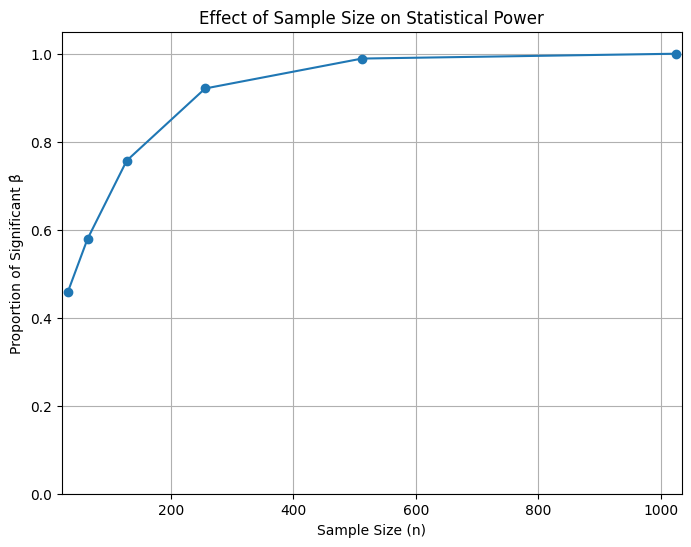

In [77]:
# Plot results
plt.figure(figsize=(8,6))  # Adjust figure size
plt.plot(sample_sizes, significance_rates, marker='o', linestyle='-')

# Labels and title
plt.xlabel("Sample Size (n)")
plt.ylabel("Proportion of Significant β̂")
plt.title("Effect of Sample Size on Statistical Power")

# Adjust axis limits
plt.ylim(0, 1.05)
plt.xlim(min(sample_sizes) - 10, max(sample_sizes) + 10)  # Add padding to x-axis

# Add grid
plt.grid(True)

# Show plot
plt.show()

4aii) Based on your results, explain how the power of the test changes with sample size in this context.

* The power of the test increases with sample size. Thus showing that statistical power improves with larger sample sizes.
* For small sample sizes (e.g., 𝑛 = 32), the power is low (~45%). This means that in about 55% of cases, the test fails to detect a significant effect.
* However, As sample size increases (e.g., 𝑛 = 128, 256), the power grows rapidly (~90%). So more data reduces the standard error of β^, making it easier to detect the effect.
*  For very large sample sizes (e.g., 𝑛 = 512, 1024), the power approaches 100%. This means the test almost always correctly identifies β^ as significant. At this point, the sample is large enough that even small deviations from zero become statistically detectable.
* Thus, increasing sample size is one of the most effective ways to improve statistical power in hypothesis testi

4b) Now, consider how you might increase the power of your test without changing the sample size. Propose a method that could potentially increase the power in this specific scenario, and explain the reasoning behind this method.

An effective solution would be to include a Quadratic Term (𝑥^2) in the
Regression Model. The true relationship from the graph above shows a quadratic relationship between the variables but the analysis has been fitting a linear model
* y = α + βx + η

The model is misspecified because it does not account for the quadratic nature of
* y = 2 + (1/18)x^2 + ε

Thus by adding x^2 as another independent variable to the model, the new model to be estimated will be:

* y = α + β1x + β1x^2 + η

This new model will capture the true relationship better and reduce unexplained variance while improving power without requiring more data